In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

from __future__ import print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import copy, pickle, os, time
import argparse 
from google.colab import drive
import random
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
#### Shervin Minaee
#### March 2020
#### Inference code for covid detection
from __future__ import print_function
import torch, os, copy, time, pickle
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pandas as pd
from torchvision.datasets.folder import IMG_EXTENSIONS
from torchvision.datasets import ImageFolder
from sklearn.metrics import confusion_matrix
import glob, pickle
import seaborn as sn
import argparse
start_time= time.time()
import pandas as pd
import numpy as np
import random
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from skimage.io import imread
import PIL
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
len(os.listdir('/content/gdrive/MyDrive/dataset/images'))

704

In [ ]:
len(os.listdir('/content/gdrive/MyDrive/dataset/masks'))

704

In [ ]:
import cv2
import os
from PIL import Image

def load_images_from_folder(folder):
    images = []
    i = 0
    for filename in os.listdir(folder):
        i = i + 1
        print(i)
        # open method used to open different extension image file
        im = Image.open(os.path.join(folder,filename))
        # .convert('L')
        img = cv2.imread(os.path.join(folder,filename))
        if im is not None:
            images.append(im)
    return images

In [ ]:
train_pic = load_images_from_folder('/content/gdrive/MyDrive/dataset/images')

In [ ]:
print(len(train_pic))

704


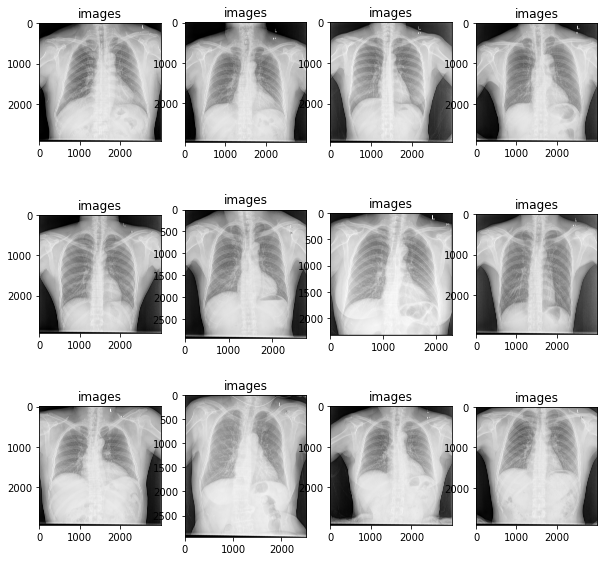

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    ax.title.set_text('images')
    plt.imshow(train_pic[i])
plt.show()  # display it

In [ ]:
train_mask = load_images_from_folder('/content/gdrive/MyDrive/dataset/masks')

In [ ]:
print(len(train_mask))

704


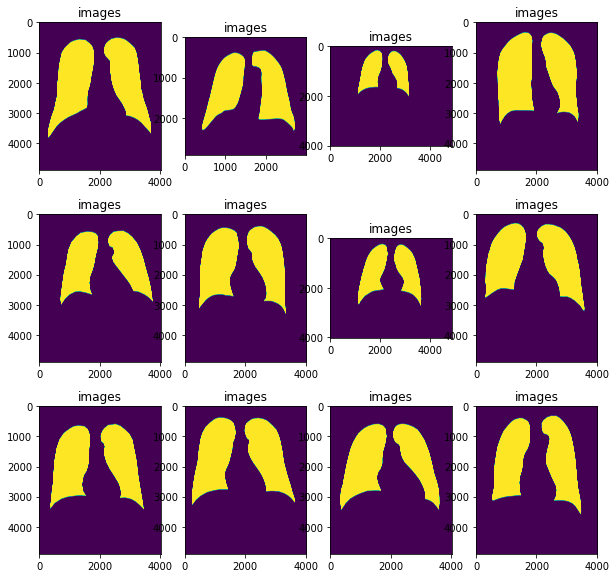

In [ ]:
plt.figure(figsize=(10,10))
for i in range(12):
    ax=plt.subplot(3,4,i+1)
    ax.title.set_text('images')
    plt.imshow(train_mask[i])
plt.show()  # display it

In [ ]:
!pip install split_folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/gdrive/MyDrive/dataset/'
output_folder = '/content/gdrive/MyDrive/fateh_data/'

In [ ]:
splitfolders.ratio(input_folder ,output_folder, seed=42 , ratio = (0.8 , 0.2) , group_prefix = None )

Copying files: 1408 files [01:53, 12.41 files/s]


In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam # - Works
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x
    ""
    #Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
      activation = 'sigmoid'
    else:
      activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model

In [ ]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import random
#from tensorflow.keras.optimizers import Adam
#import tensorflow as tf

In [ ]:
image_dir = "/content/gdrive/MyDrive/dataset/images"
mask_dir = "/content/gdrive/MyDrive/dataset/masks"

img_list = os.listdir(image_dir)
img_list.sort()  #Very important to sort as we want to match images and masks with same number. 
msk_list = os.listdir(mask_dir)
msk_list.sort()
num_images = len(os.listdir(image_dir))
print("Total number of training images are: ", num_images)

In [ ]:
print(type(img_list))

<class 'list'>


In [ ]:
print(len(img_list))

704


In [ ]:
print(msk_list[128][:-4] )

mask213


In [ ]:
len(os.listdir('/content/gdrive/MyDrive/dataset2/images'))

704

In [ ]:
j = 0

for i in msk_list:
  img = Image.open('/content/gdrive/MyDrive/dataset/masks/{}'.format(i))
  name = i[:-4]
  img.save('/content/gdrive/MyDrive/dataset2/masks/{}.tif'.format(name))
  time.sleep(0.3)
  print(j , i)
  j = j+1
  

In [ ]:
len(os.listdir('/content/gdrive/MyDrive/dataset2/masks'))

704

In [ ]:
  image_dir = "/content/gdrive/MyDrive/dataset2/images"
mask_dir = "/content/gdrive/MyDrive/dataset2/masks"

img_list = os.listdir(image_dir)
img_list.sort()  #Very important to sort as we want to match images and masks with same number. 
msk_list = os.listdir(mask_dir)
msk_list.sort()
num_images = len(os.listdir(image_dir))
print("Total number of training images are: ", num_images)

Total number of training images are:  704


In [ ]:
print(msk_list[682])

mask8.tif


In [ ]:
import splitfolders
input_folder = '/content/gdrive/MyDrive/dataset2/'
output_folder = '/content/gdrive/MyDrive/fateh_data/'

In [ ]:
splitfolders.ratio(input_folder ,output_folder, seed=42 , ratio = (0.8 , 0.2) , group_prefix = None )

Copying files: 1408 files [03:49,  6.15 files/s]


In [ ]:
len(os.listdir('/content/gdrive/MyDrive/fateh_data/train/masks'))

563

In [ ]:
len(os.listdir('/content/gdrive/MyDrive/fateh_data/val/masks'))

141

In [ ]:
train_img_dir = '/content/gdrive/MyDrive/fateh_data/train/images'
train_mask_dir = "/content/gdrive/MyDrive/fateh_data/train/masks"

img_list = os.listdir(train_img_dir)
img_list.sort()  #Very important to sort as we want to match images and masks with same number. 
msk_list = os.listdir(train_mask_dir)
msk_list.sort()
num_images = len(os.listdir(train_img_dir))
print("Total number of training images are: ", num_images)

Total number of training images are:  563


/content/gdrive/MyDrive/fateh_data/train/images/img376.tif <class 'str'>
/content/gdrive/MyDrive/fateh_data/train/masks/mask376.tif


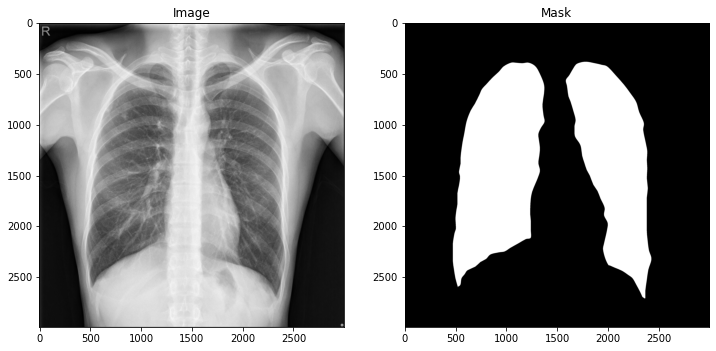

In [ ]:
img_num = random.randint(0, num_images-1)
a = train_img_dir+'/'+img_list[img_num]
print(a , type(a))
img_for_plot = cv2.imread(a, 0)
b = train_mask_dir+'/'+msk_list[img_num]
print(b)

mask_for_plot =cv2.imread(b, 0)

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(img_for_plot, cmap='gray')
plt.title('Image')
plt.subplot(122)
plt.imshow(mask_for_plot, cmap='gray')
plt.title('Mask')
plt.show()

In [ ]:
print("Unique values in the mask are: ", np.unique(mask_for_plot))

Unique values in the mask are:  [  0 255]


In [ ]:
#Sample code to encode this single image. We will include this as part of our data gen. 
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
h, w = mask_for_plot.shape  
mask_for_plot_reshaped = mask_for_plot.reshape(-1,1)
mask_for_plot_reshaped_encoded = labelencoder.fit_transform(mask_for_plot_reshaped)
mask_for_plot_encoded = mask_for_plot_reshaped_encoded.reshape(h, w)
print("Unique values in the mask after endcoding are: ", np.unique(mask_for_plot_encoded))

In [ ]:
seed=24
batch_size= 16
n_classes=2

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc. 
def preprocess_data(img, mask, num_class):
    #Scale images
    img = img / 255. #This can be done in ImageDataGenerator but showing it outside as an example
    #Convert mask to one-hot
    labelencoder = LabelEncoder()
    n, h, w, c = mask.shape  
    mask = mask.reshape(-1,1)
    mask = labelencoder.fit_transform(mask)
    mask = mask.reshape(n, h, w, c)
    mask = to_categorical(mask, num_class)
      
    return (img, mask)

#Define the generator.
#We are not doing any rotation or zoom to make sure mask values are not interpolated.
#It is important to keep pixel values in mask as 0, 1, 2, 3, .....
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
    
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        color_mode = 'grayscale',
        target_size=(128,128),
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        target_size=(128,128),
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)

In [ ]:
train_img_path = '/content/gdrive/MyDrive/fateh_data/train/images'
train_mask_path = '/content/gdrive/MyDrive/fateh_data/train/masks'
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=2)

val_img_path = '/content/gdrive/MyDrive/fateh_data/val/images'
val_mask_path = '/content/gdrive/MyDrive/fateh_data/val/masks'
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=2)

In [ ]:
x, y = train_img_gen.__next__()

Found 560 images belonging to 1 classes.
Found 560 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(x.shape)
print(y.shape)
print("max value in image dataset is: ", x.max())

(16, 128, 128, 1)
(16, 128, 128, 2)
max value in image dataset is:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


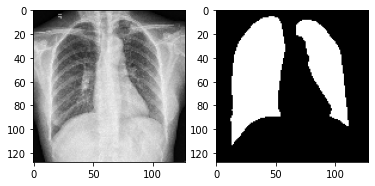

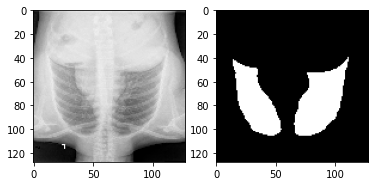

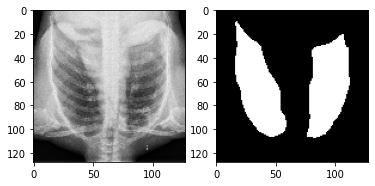

In [ ]:
#Make sure the generator is working and that images and masks are indeed lined up. 
#Verify generator.... In python 3 next() is renamed as __next__()
x, y = train_img_gen.__next__()

for i in range(0,3):
    image = x[i,:,:,0]
    mask = np.argmax(y[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

Found 128 images belonging to 1 classes.
Found 128 images belonging to 1 classes.


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


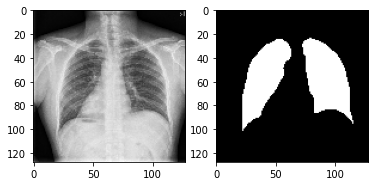

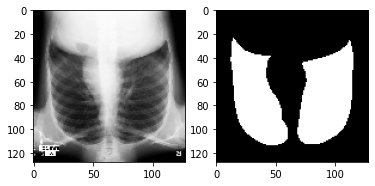

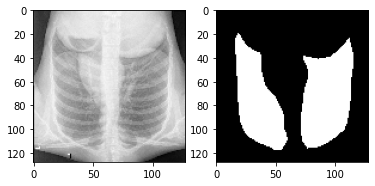

In [ ]:
x_val, y_val = val_img_gen.__next__()

for i in range(0,3):
    image = x_val[i,:,:,0]
    mask = np.argmax(y_val[i], axis=2)
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1,2,2)
    plt.imshow(mask, cmap='gray')
    plt.show()

In [ ]:
#Define the model metrcis and load model. 

num_train_imgs = len(os.listdir('/content/gdrive/MyDrive/fateh_data/train/images/train'))
print(num_train_imgs)
num_val_images = len(os.listdir('/content/gdrive/MyDrive/fateh_data/val/images/val'))
print(num_val_images)
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size

IMG_HEIGHT = x.shape[1]
IMG_WIDTH  = x.shape[2]
IMG_CHANNELS = x.shape[3]
input_shape = (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
n_classes=2

560
128


In [ ]:
model = build_unet(input_shape, n_classes=2)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

softmax
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_76 (Conv2D)             (None, 128, 128, 64  640         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_72 (BatchN  (None, 128, 128, 64  256        ['conv2d_76[0][0]']              
 ormalization)                  )                                                     

In [ ]:
history=model.fit(train_img_gen,
          steps_per_epoch=steps_per_epoch,
          epochs=30,
          verbose=1,
          validation_data=val_img_gen,
          validation_steps=val_steps_per_epoch)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


35/35 [==============================] - 71s 2s/step - loss: 0.3597 - accuracy: 0.8586 - val_loss: 4.6646 - val_accuracy: 0.6663
Epoch 2/30
35/35 [==============================] - 65s 2s/step - loss: 0.2272 - accuracy: 0.9184 - val_loss: 16.3520 - val_accuracy: 0.5670
Epoch 3/30
35/35 [==============================] - 67s 2s/step - loss: 0.1796 - accuracy: 0.9345 - val_loss: 8.3239 - val_accuracy: 0.5097
Epoch 4/30
35/35 [==============================] - 66s 2s/step - loss: 0.1855 - accuracy: 0.9387 - val_loss: 2.8307 - val_accuracy: 0.6861
Epoch 5/30
35/35 [==============================] - 68s 2s/step - loss: 0.1701 - accuracy: 0.9376 - val_loss: 1.5026 - val_accuracy: 0.6972
Epoch 6/30
35/35 [==============================] - 70s 2s/step - loss: 0.1481 - accuracy: 0.9459 - val_loss: 0.3647 - val_accuracy: 0.8507
Epoch 7/30
35/35 [==============================] - 67s 2s/step - loss: 0.1290 - accuracy: 0.9531 - val_loss: 0.4312 - val_accuracy: 0.7965
Epoch 8/30
35/35 [============

In [ ]:
#Save the model for future use
model.save('/content/gdrive/MyDrive/fateh_data/unet_30epochs.hdf5')

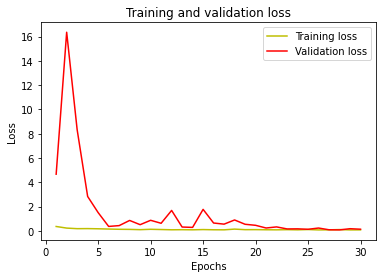

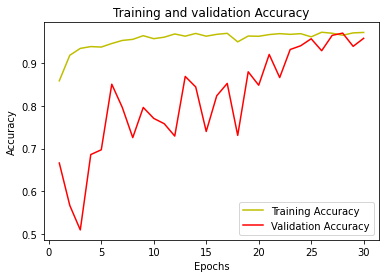

In [ ]:
###
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Load previously saved model
from keras.models import load_model
model = load_model('/content/gdrive/MyDrive/fateh_data/unet_30epochs.hdf5', compile=False)

In [ ]:
test_image_batch, test_mask_batch = val_img_gen.__next__()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:

print(len(test_image_batch[0][0]))


128


In [ ]:
y_pred=model.predict(test_image_batch)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_argmax = np.argmax(test_mask_batch, axis=3)

In [ ]:
#Using built in keras function
from keras.metrics import MeanIoU
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_argmax, y_pred_argmax)
print("Mean IoU =", IOU_keras.result().numpy())

Mean IoU = 0.90736014


In [ ]:
#To calculate I0U for each class...
values = np.array(IOU_keras.get_weights()).reshape(n_classes, n_classes)
print(values)
class1_IoU = values[0,0]/(values[0,0] + values[0,1]  + values[1,0])
class2_IoU = values[1,1]/(values[1,1] + values[1,0]  + values[0,1])


print("IoU for class1 is: ", class1_IoU)
print("IoU for class2 is: ", class2_IoU)


[[194224.   5370.]
 [  4067.  58483.]]
IoU for class1 is:  0.9536632
IoU for class2 is:  0.8610571


(128, 128, 1)
(1, 128, 128, 1)


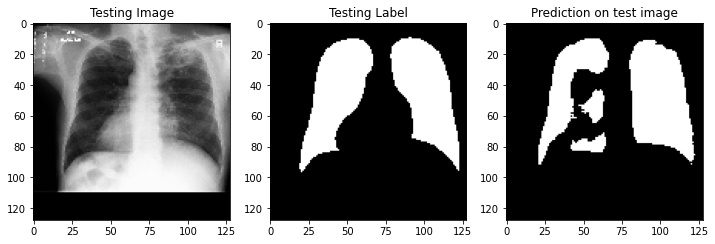

In [ ]:
 
import random
test_img_number = random.randint(0, len(test_image_batch)-1)
test_img = test_image_batch[test_img_number]
print(test_img.shape)
ground_truth=test_mask_batch[test_img_number]
ground_truth = np.argmax(ground_truth, axis=2)
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='gray')
plt.show()


(128, 128, 1)
(1, 128, 128, 1)


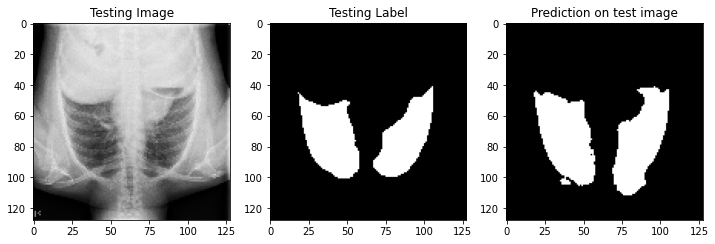

In [ ]:

import random
test_img_number = random.randint(0, len(test_image_batch)-1)
test_img = test_image_batch[test_img_number]
print(test_img.shape)
ground_truth=test_mask_batch[test_img_number]
ground_truth = np.argmax(ground_truth, axis=2)
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='gray')
plt.show()


(128, 128, 1)
(1, 128, 128, 1)


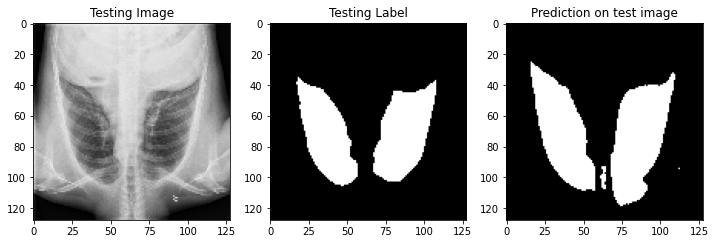

In [ ]:

import random
test_img_number = random.randint(0, len(test_image_batch)-1)
test_img = test_image_batch[test_img_number]
print(test_img.shape)
ground_truth=test_mask_batch[test_img_number]
ground_truth = np.argmax(ground_truth, axis=2)
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='gray')
plt.show()


(128, 128, 1)
(1, 128, 128, 1)


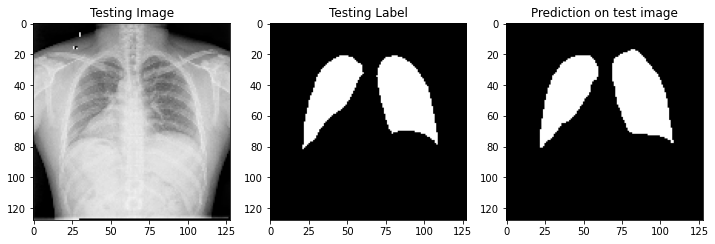

In [ ]:
 
import random
test_img_number = random.randint(0, len(test_image_batch)-1)
test_img = test_image_batch[test_img_number]
print(test_img.shape)
ground_truth=test_mask_batch[test_img_number]
ground_truth = np.argmax(ground_truth, axis=2)
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='gray')
plt.show()


In [ ]:
#Predict on a few images
#model = get_model()
#model.load_weights('???.hdf5')  
import random
test_img_number = random.randint(0, len(test_image_batch)-1)
test_img = test_image_batch[test_img_number]
print(test_img.shape)
ground_truth=test_mask_batch[test_img_number]
ground_truth = np.argmax(ground_truth, axis=2)
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth, cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(predicted_img, cmap='gray')
plt.show()


In [ ]:
train_image_batch, train_mask_batch = train_img_gen.__next__()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[[0.18431373]
  [0.1764706 ]
  [0.18431373]
  ...
  [0.28627452]
  [0.2901961 ]
  [0.        ]]

 [[0.16078432]
  [0.14509805]
  [0.15686275]
  ...
  [0.30588236]
  [0.23137255]
  [0.        ]]

 [[0.16078432]
  [0.13725491]
  [0.14509805]
  ...
  [0.5294118 ]
  [0.5019608 ]
  [0.        ]]

 ...

 [[0.        ]
  [0.18431373]
  [0.19607843]
  ...
  [0.2       ]
  [0.2       ]
  [0.19215687]]

 [[0.        ]
  [0.1882353 ]
  [0.18039216]
  ...
  [0.1764706 ]
  [0.20784314]
  [0.20784314]]

 [[0.        ]
  [0.18039216]
  [0.1764706 ]
  ...
  [0.2       ]
  [0.19215687]
  [0.19607843]]] (128, 128, 1)
(1, 128, 128, 1)


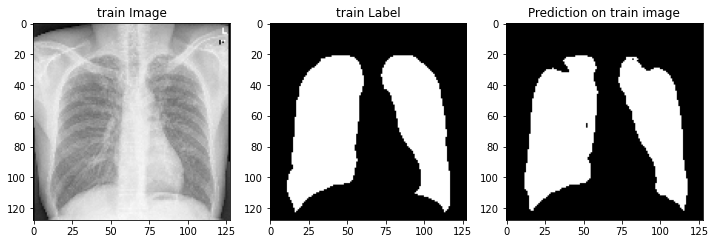

In [ ]:
 
import random
test_img_number = random.randint(0, len(train_image_batch)-1)
test_img = train_image_batch[test_img_number]
print(test_img , test_img.shape)
ground_truth=train_mask_batch[test_img_number]
ground_truth = np.argmax(ground_truth, axis=2)
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('train Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('train Label')
plt.imshow(ground_truth, cmap='gray')
plt.subplot(233)
plt.title('Prediction on train image')
plt.imshow(predicted_img, cmap='gray')
plt.show()
